# Assignment Decision Tree (Fraud Data)

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not



# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [2]:
Data=pd.read_csv("Fraud_check.csv")

In [3]:
Data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
Data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# EDA

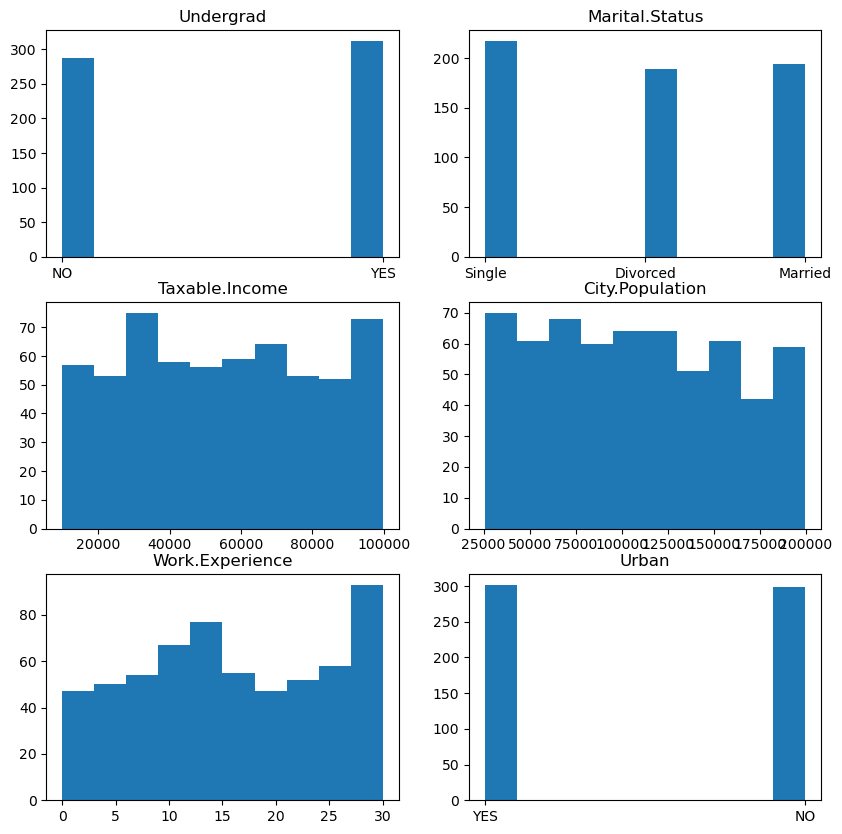

In [6]:
fig,axs=plt.subplots(3,2,figsize=(10,10))
axs[0][0].hist(Data["Undergrad"])
axs[0][0].set_title("Undergrad")
axs[0][1].hist(Data["Marital.Status"])
axs[0][1].set_title("Marital.Status")
axs[1][0].hist(Data["Taxable.Income"])
axs[1][0].set_title("Taxable.Income")
axs[1][1].hist((Data["City.Population"]))
axs[1][1].set_title("City.Population")
axs[2][0].hist((Data["Work.Experience"]))
axs[2][0].set_title("Work.Experience")
axs[2][1].hist(Data["Urban"])
axs[2][1].set_title("Urban")   
plt.show()

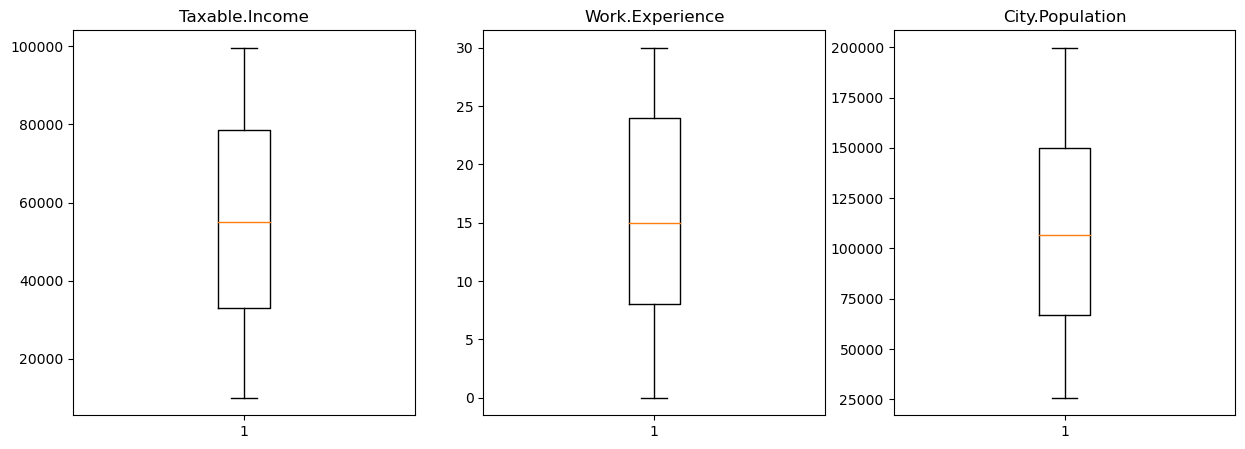

In [7]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].boxplot(Data["Taxable.Income"])
axs[0].set_title("Taxable.Income")
axs[1].boxplot(Data["Work.Experience"])
axs[1].set_title("Work.Experience")
axs[2].boxplot(Data["City.Population"])
axs[2].set_title("City.Population")
plt.show()

### Taxable . Income categorization

taxable_income <= 30000 as "Risky" and others are "Good"

In [8]:
Conditions=[(Data["Taxable.Income"]<=30000),(Data["Taxable.Income"]>30000)]
Categories=["Risky","Good"]

In [9]:
Data["Taxable.Income"]=np.select(Conditions,Categories)

Text(0.5, 1.0, 'Traget Features')

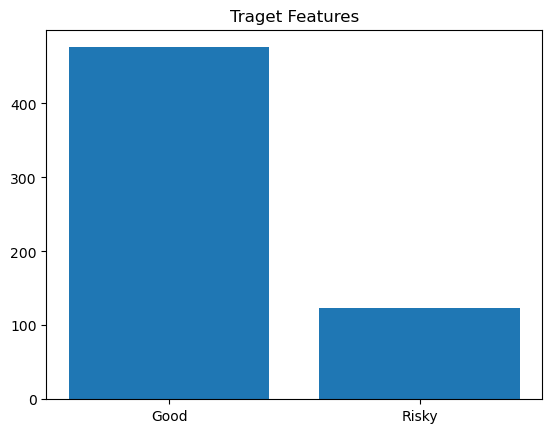

In [10]:
plt.bar(Data["Taxable.Income"].unique(),Data["Taxable.Income"].value_counts())
plt.title("Traget Features")

The above dataset is unbalanced which may affect the model

In [11]:
Data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


### Label Encoder

In [12]:
label=LabelEncoder()

In [13]:
Data["Taxable.Income"]=label.fit_transform(Data["Taxable.Income"])

### Dummy variable creation

In [14]:
Data=pd.get_dummies(Data,columns=["Undergrad","Marital.Status","Urban"])

In [15]:
Data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


### X and Y splittig of Data

In [16]:
X=Data.drop(["Taxable.Income"],axis=1)
Y=Data["Taxable.Income"]

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [18]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


### Hyper Parameter tuning for Decision Tree using Grid Search CV

In [19]:
est=DecisionTreeClassifier(random_state=42)
params={"max_depth":range(5,20,1),"min_samples_split":range(1,10,1)}

In [20]:
GCV=GridSearchCV(estimator=est,param_grid=params,cv=5)

## Model Building with train test split method

In [21]:
model=GCV.fit(X_train,Y_train)

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0

In [22]:
GCV.best_params_

{'max_depth': 5, 'min_samples_split': 3}

In [23]:
GCV.best_score_

0.7711728395061728

In [24]:
results = GCV.cv_results_
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'max_depth': 5, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 18, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 13, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 11, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 14, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 10, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 15, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 9, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 12, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 8, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 17, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 7, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 16, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 19, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 6, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 5, '

max depth we will take as 10 because if we take very less value for max depth class 1 not detecting properly

## model as per Grid Search Cv

In [25]:
Model=DecisionTreeClassifier(max_depth=10,min_samples_split=5,random_state=42)

In [26]:
Model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [27]:
Class=("Risky","Good")
features=(X.columns)

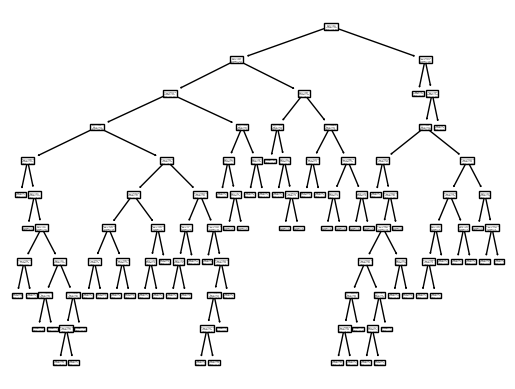

In [28]:
tree.plot_tree(Model)
plt.show()

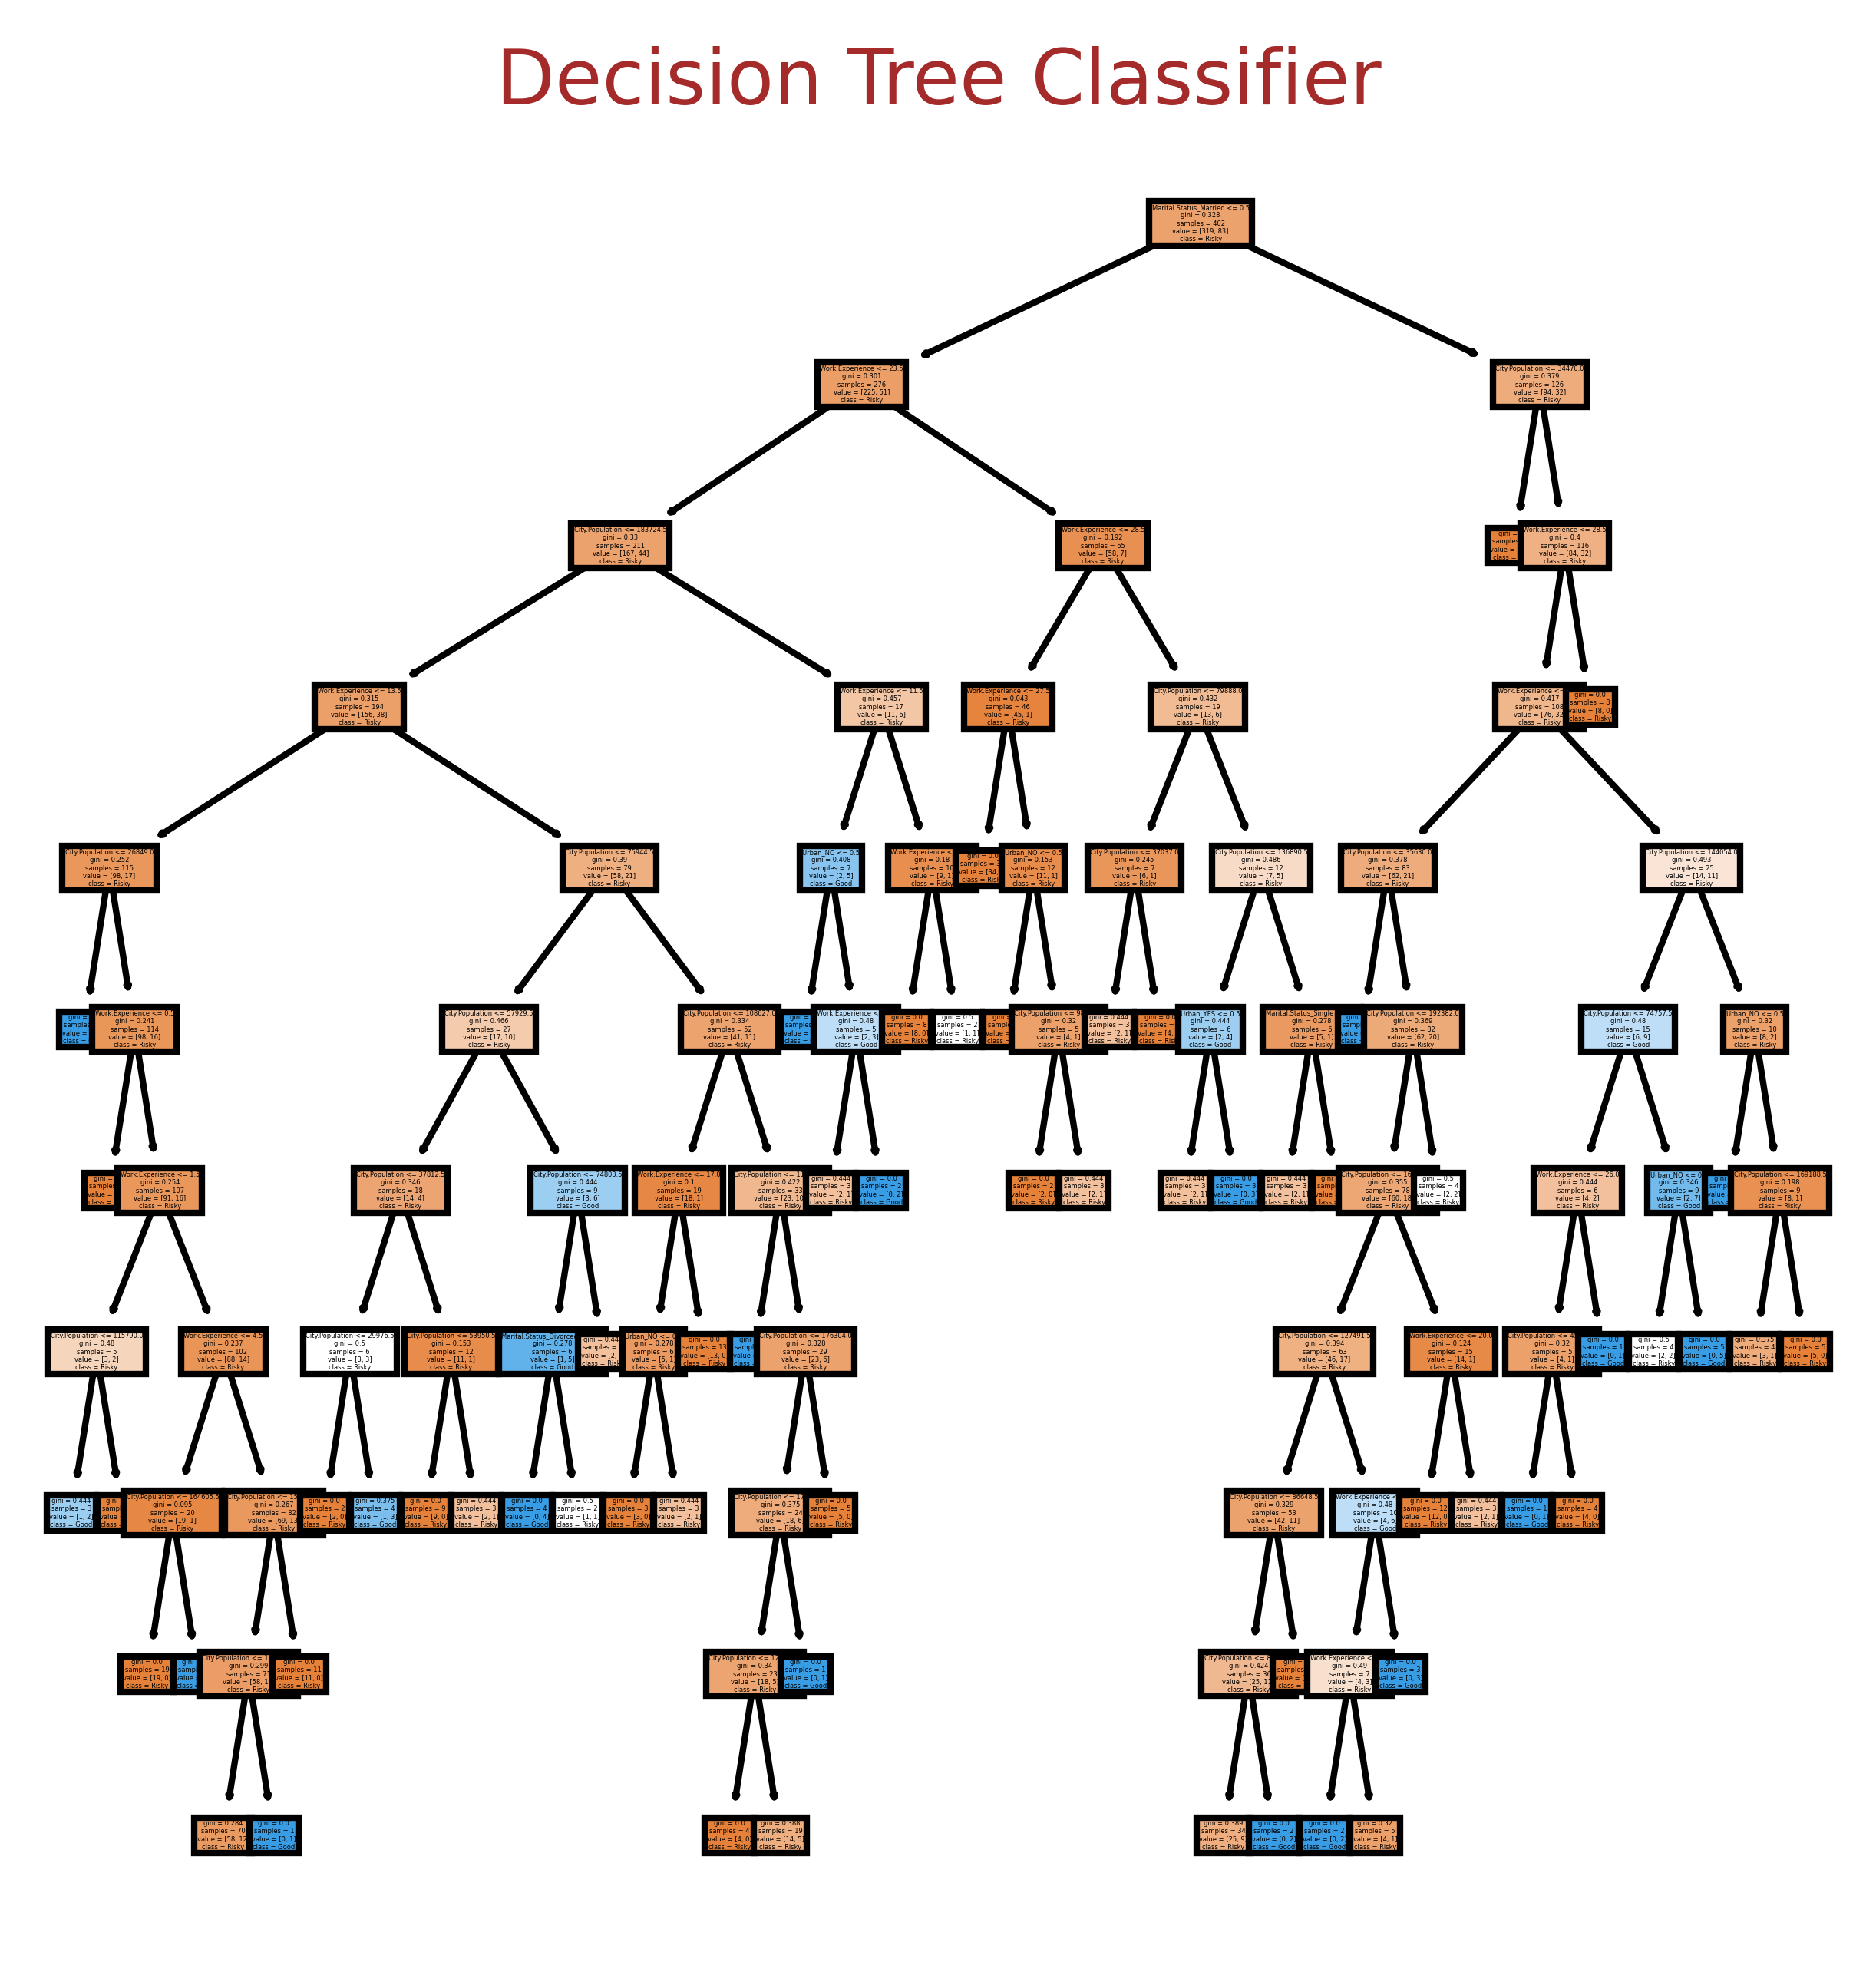

In [29]:
fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=600)
tree.plot_tree(Model,class_names=Class,feature_names=features,filled=True)
axs.set_title("Decision Tree Classifier",color='brown')
plt.show()

In [30]:
pred=model.predict(X_test)
pd.Series(pred).value_counts()

0    179
1     19
dtype: int64

##### Training Accuracy

In [31]:
print(accuracy_score(Y_train,model.predict(X_train)))

0.818407960199005


In [32]:
print(classification_report(Y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       319
           1       0.67      0.24      0.35        83

    accuracy                           0.82       402
   macro avg       0.75      0.60      0.62       402
weighted avg       0.80      0.82      0.78       402



##### Testing Accuracy

In [33]:
print(accuracy_score(Y_test,pred))

0.7171717171717171


In [34]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.11      0.05      0.07        41

    accuracy                           0.72       198
   macro avg       0.44      0.47      0.45       198
weighted avg       0.64      0.72      0.67       198



## Model with KFold Technique

In [35]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

In [36]:
Model=DecisionTreeClassifier(max_depth=5,min_samples_split=3,random_state=42)

In [37]:
results = cross_val_score(Model, X, Y, cv=kfold)
print(results.mean())

0.765


In [38]:
y_pred = cross_val_predict(Model, X, Y, cv=kfold)

# Get classification report for predicted target values
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       476
           1       0.13      0.02      0.04       124

    accuracy                           0.77       600
   macro avg       0.46      0.49      0.45       600
weighted avg       0.65      0.77      0.70       600



DT Shows overfitting and Even with KFold Class 1 shows very less accuracy.Since the data set is unbalanced we can try for Combined Sampling with Tomek Links and SMOTE

'' Combined Sampling is a technique for addressing class imbalance by combining oversampling and undersampling. Here's how you can use Combined Sampling with Decision Trees:

Split the dataset into training and testing sets. The training set should be used for resampling, while the testing set is used for evaluation.

Apply undersampling to the training set using a technique such as Tomek links or NearMiss. This will reduce the number of majority class samples.

Apply oversampling to the training set using a technique such as SMOTE or ADASYN. This will increase the number of minority class samples.

Train a Decision Tree on the resampled training set.

Evaluate the Decision Tree on the testing set.''

## Combined Sampling

In [39]:
SMOTE = SMOTETomek(random_state=42)
TM = TomekLinks()
X_train_res, y_train_res = TM.fit_resample(X_train,Y_train)
X_train_res, y_train_res = SMOTE.fit_resample(X_train_res, y_train_res)

In [40]:
model=GCV.fit(X_train_res, y_train_res)

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0

In [41]:
results = GCV.cv_results_
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'max_depth': 5, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 8, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 13, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 12, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 14, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 11, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 15, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 16, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 17, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 9, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 18, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 10, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 7, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 19, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 6, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 10, 

In [42]:
GCV.best_params_

{'max_depth': 10, 'min_samples_split': 8}

In [43]:
GCV.best_score_

0.7422435020519835

In [44]:
# train decision tree on resampled training set
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=8,
                             random_state=42)
clf.fit(X_train_res,y_train_res)

# evaluate decision tree on testing set
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       157
           1       0.12      0.17      0.14        41

    accuracy                           0.58       198
   macro avg       0.44      0.43      0.43       198
weighted avg       0.63      0.58      0.60       198



Class one accuracy for testing data improved for combined sampling.

# Conclusion

When using Decition Tree model accuracy is over fitting and tried different methods but accuracy not perfect so better go for ensemble models like bagging or Random Forest